<a href="https://colab.research.google.com/github/justbenjie/Students_EDA/blob/main/data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import auth

auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

# Подготовка данных




## Загрузка данных в pandas 

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import re
import pylab


In [ ]:

SMALL_SIZE = 11
MEDIUM_SIZE = 13
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
sheetid = "1Iyjkdgw4GC-YRrb0ZYWCvE9MPAUKC7OEEki_1SuxKPA"
sh = gc.open_by_key(sheetid)
worksheet = sh.sheet1
values_list = worksheet.get_all_values()
df = pd.DataFrame(values_list[1:], columns=values_list[0])

In [ ]:
print(df.shape)
df.head()

(170, 22)


,Timestamp,В каком вузе вы учились или учитесь?,Ваша специальность,"Год окончания ВУЗа, или текущий курс","Ваши баллы по ЦТ (математика 90, русский 83, физика 83)","Ваши отметки в аттестате за 11 класс по соответствующим предметам (математика 9, русский 10, физика 9)",Ваша отметка по математике в университете,Ваш пол,Участие в олимпиадах по математике,Умеете ли вы играть в шахматы?,...,Ваш любимый жанр фильмов,Владеете ли вы каким-либо музыкальным инструментом?,Занимаетесь ли вы спортом?,Сколько часов в день вы спите?,"Есть ли у вас вредные привычки (курение, алкоголь, переедание и т.п.)?",Имеете ли вы проблемы со зрением?,Ваш темперамент,Карьера или семья?,К какому политическому направлению вы себя относите,Отношение к религии
0,2/15/2022 1:18:59,БНТУ,Программное обеспечение информационных технологий,2,"Математика 90, русский 83, физика 83","9, 10, 9",9,мужской,да,да,...,Фантастика,скорее да,скорее да,8,скорее нет,скорее да,скорее интроверт,скорее карьера,скорее правый,верующий
1,2/15/2022 1:50:41,БГУИР,Информационные технологии и управление в техни...,2,Математика 73. Физика 82. Белорусский 81,Математика 10. Физика 9. Белорусский 7(,6 грустно :(,мужской,да,да,...,Фантастика,скорее да,скорее да,5 - 8 часов,скорее нет,скорее нет,скорее экстраверт,скорее карьера,что это,верующий
2,2/15/2022 1:51:46,Bntu,Исит,2 курс,"Математика 88, русский 89, физика 88","Математика 10, русский 10, физика 10","10,10, 9",женский,да,да,...,"Биография, драма, комедия",скорее нет,скорее да,6-7,скорее нет,скорее да,скорее экстраверт,скорее семья,что это,агностик
3,2/15/2022 2:04:21,БГТУ,Международный менеджмент,1,математика 65 русский 79 английский 72,русский 9 английский 9 математика 9,6,женский,да,нет,...,"ужасы, психологические",скорее да,скорее нет,"по-разному, но у среднем около 5",скорее да,скорее нет,скорее экстраверт,скорее карьера,что это,агностик
4,2/15/2022 2:07:24,БНТУ,ПОИТ,2,"математика 65, русский 69, физика 67","математика 9, русский 10, физика 8",5,мужской,нет,да,...,Фантастика,скорее нет,скорее да,6,скорее да,скорее нет,скорее интроверт,скорее семья,скорее правый,агностик


In [ ]:
df.columns = ['datetime', 'university', 'specialization', 'year', 'CT_score', 'school_score', 'math_score', 'gender', 'math_olympiad', 'chess', 'rubiks_cube', 'books', 'films_genre', 'musician', 'sport', 'sleep', 'bad_habit', 'vision_problem', 'temperament', 'career_family', 'politic_view', 'belief']

## Университет

In [ ]:
df['university'] = df['university'].apply(lambda x: x.lower().strip())
df['university'].replace(to_replace={'bntu': 'бнту', 'бгпу им.м.танка': 'бгпу', 'ниу вшэ': 'вшэ'}, inplace = True)
condition = (df['university'] == 'не в каком') | (df['university'] == 'нигде')
df.loc[condition, 'university'] = np.NAN


In [ ]:
condition = df['university'].isin(['бгту', 'бгму', 'бгэу', 'бгпу', 'мглу', 'мгу',
       'вгму', np.NAN, 'московский авиационный институт', 'митсо',
       'бгату', 'кубгу', 'могилевский медицинский колледж', 'všcht',
       'иностранный', 'вшэ'])
df.loc[condition, 'university'] = 'другие'

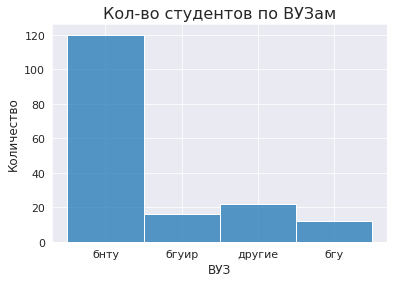

In [ ]:
sns.set_style("darkgrid")
hist = sns.histplot(data=df['university'], hue_order=['бнту', 'бгуир', 'бгу', 'другие'])
hist.set_title('Кол-во студентов по ВУЗам', fontsize=16)
hist.set_xlabel('BУЗ', fontsize=12)
hist.set_ylabel('Количество', fontsize=12)
None


In [ ]:
print(df.university.unique())
print(df.university.value_counts())

['бнту' 'бгуир' 'другие' 'бгу']
бнту      120
другие     22
бгуир      16
бгу        12
Name: university, dtype: int64


## Текущий курс (год окончания университета)

In [ ]:
df['year'] = df['year'].apply(lambda x: x.lower().strip())

In [ ]:
df.year.value_counts()

2 курс                52
2                     25
3                     16
1 курс                15
2024                  15
3 курс                14
2025                   4
2022                   4
1                      4
3-ий курс              2
2023                   2
4                      2
отчислен, был бы 3     1
3курс                  1
5 курс                 1
3ий курс               1
2й курс                1
1-й                    1
24                     1
1 курс(2025)           1
2 к                    1
2026                   1
второй курс            1
ещё не знаю            1
2018                   1
4 курс                 1
1987                   1
Name: year, dtype: int64

In [ ]:
for str_year, num_year in zip([r'(перв|25|26)', r'(втор|24)', r'(трет|23)', r'(четверт|22)', r'(пят)'], ['1', '2', '3', '4', '5']):
  df['year'].loc[df.year.str.contains(str_year)==True] = num_year

df.loc[df.year.str.contains(r'(?:не|ник|199|198|201|200)', na=False), 'year'] = np.NAN

df['year'] = df['year'].str.extract('(\d+)', expand = False)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


## Специальность

In [ ]:
df['stream'] = df['specialization']

In [ ]:
df['stream'] = df['stream'].apply(lambda x: x.lower().strip())
df.stream = df.stream.loc[(df.stream.str.contains(r'(програм|поит|представ|исит)')) & (df.university == "бнту") & (df.year=='2')]
df.stream[df.stream.notna()] = 'поит исит 2 курс'
df.stream[df.stream.notna()].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


поит исит 2 курс    38
Name: stream, dtype: int64

## ЦТ, аттестат, математика в университете

In [ ]:
df['CT_score'] = df['CT_score'].apply(lambda x: x.lower().strip())
df['CT_math'] = np.NAN
df['CT_physics'] = np.NAN
df['CT_native_language'] = np.NAN
df['CT_foreign_language'] = np.NAN
df['CT_total'] = np.NAN

df['school_score'] = df['school_score'].apply(lambda x: x.lower().strip())
df['school_math'] = np.NAN
df['school_physics'] = np.NAN
df['school_native_language'] = np.NAN
df['school_foreign_language'] = np.NAN
df['school_total'] = np.NAN

df['university_math'] = np.NAN

### Извлечение общего балла по ЦТ и аттестата

In [ ]:
def get_total(col_name):
  total = df[col_name]
  total = total.apply(lambda x: re.sub("[^0-9]", " ", x).split())
  total.loc[total.str.len()<3] = np.NAN
  total.loc[total.str.len()>2] = total.loc[total.str.len()>2].apply(lambda x: sum(list(map(int, x[0:3]))))
  return total

df['CT_total'] = get_total('CT_score')
df['school_total'] = get_total('school_score')

df['school_total']

0      28
1      26
2      30
3      27
4      27
       ..
165    23
166    23
167    28
168    30
169    28
Name: school_total, Length: 170, dtype: object

### Извлечение баллов по отдельным предметам




In [ ]:
scores_cols = ['CT_score', 'school_score']
subj_cols = [['CT_math', 'CT_native_language', 'CT_physics', 'CT_foreign_language'], ['school_math', 'school_native_language', 'school_physics', 'school_foreign_language']]
for score, col_name in zip(scores_cols, subj_cols):
  # удаление знаков пунктуации
  df[score] = df[score].str.replace('[^\w\s]|[\n]',' ', regex=True)
  df[score] = df[score].str.replace('(прим|по|около|соотв|бал)\w*', '', regex=True)
  df[score] = df[score].str.strip()
  scores = df[score]

  # заполнение колонок отдельных предметов
  patterns = {"математика": u'м[^и]\w*\s*(\d+)', "родной язык": u'[р|б][^ио]\w*\s*(\d+)', "физика": u'ф[^р]\w*\s*(\d+)'}

  for pattern, col in zip(patterns.keys(), col_name[0:3]):
    match = scores.astype('str').str.extract(patterns[pattern])
    df[col] = match[0]

  match = scores.astype('str').str.extract("(нем|анг|фран)\w*\s*(\d+)")
  df[col_name[3]] = match[1]

  

In [ ]:
# обработка полей, содержащих только числа
digit_only = df.CT_score[df.CT_score.str.replace(" ", "").str.isdigit()]
three_values = df.CT_score[digit_only.index][digit_only.str.split().str.len()==3]
for ind in three_values.index:
  df.CT_math[ind], df.CT_native_language[ind], df.CT_physics[ind] = three_values[ind].split()


one_value = df.CT_score[digit_only.index][digit_only.str.split().str.len()==1]
for ind in one_value.index:
  if 20 < int(one_value[ind].replace(" ", "")) <= 100:
    df.CT_math[ind], df.CT_native_language[ind], df.CT_physics[ind] = one_value[ind], one_value[ind], one_value[ind]
  if 100 < int(one_value[ind].replace(" ", "")) <= 300:
    df.CT_math[ind], df.CT_native_language[ind], df.CT_physics[ind] = int(one_value[ind].replace(" ", ""))//3, int(one_value[ind].replace(" ", ""))//3, int(one_value[ind].replace(" ", ""))//3


digit_only = df.school_score[df.school_score.str.replace(" ", "").str.isdigit()]
three_values = df.school_score[digit_only.index][digit_only.str.split().str.len()==3]
for ind in three_values.index:
  df.school_math[ind], df.school_native_language[ind], df.school_physics[ind] = three_values[ind].split()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-p

### Балл по математике в университете

In [ ]:
def average(x):
  if not bool(x):
    return np.NAN
  return int(sum(map(int, x))/len(x)+0.5)

df['university_math'] = df['math_score'].str.findall(r'\b\d+\b')
df['university_math'] = df['university_math'].apply(average)

In [ ]:
df['university_math'].value_counts()

7.0     31
4.0     28
6.0     26
8.0     25
9.0     18
5.0     16
10.0    11
1.0      2
Name: university_math, dtype: int64

## Количество сна 

In [ ]:
df['sleep'] = df['sleep'].str.findall(r'\b\d+\b')
df['sleep'] = df['sleep'].apply(average)

In [ ]:
df['sleep'].value_counts()

8     50
7     50
6     34
9     12
5      9
10     8
4      5
12     1
3      1
Name: sleep, dtype: int64

In [ ]:
df.sleep[82]

5

## Любимые фильмы 

In [ ]:
df['films_genre'] = df['films_genre'].apply(lambda x: x.lower().strip())

In [ ]:
df.loc[df.films_genre.str.contains(r'(?:хз|не|-|гачи|порн|эроти|любой|настроен)'), 'films_genre'] = np.NAN

## Преобразование типов столбцов и их перестановка

In [ ]:
numerical_features = ['CT_total', 'CT_math', 'CT_native_language', 'CT_physics', 'CT_foreign_language',
                      'school_total', 'school_math', 'school_native_language', 'school_physics', 'school_foreign_language',
                       'university_math', 'year', 'sleep']

for feature in numerical_features:
  df[feature] = df[feature].astype('float64')
  df[feature] = df[feature].astype('Int64')

df.drop(columns = ['CT_score', 'school_score', 'math_score', 'specialization'], axis = 1, inplace=True)

In [ ]:
df = df.reindex(columns=['university', 'stream', 'year', 'CT_total', 'CT_math', 'CT_native_language', 'CT_physics', 'CT_foreign_language',
        'school_total', 'school_math', 'school_native_language', 'school_physics', 'school_foreign_language',
        'university_math', 'gender', 'math_olympiad', 'chess', 'rubiks_cube', 'books', 'films_genre', 'musician', 'sport', 'sleep', 'bad_habit', 'vision_problem', 'temperament', 'career_family', 'politic_view', 'belief'])

In [ ]:
df.head()

,university,stream,year,CT_total,CT_math,CT_native_language,CT_physics,CT_foreign_language,school_total,school_math,...,films_genre,musician,sport,sleep,bad_habit,vision_problem,temperament,career_family,politic_view,belief
0,бнту,поит исит 2 курс,2,256,90,83,83,<NA>,28,9,...,фантастика,скорее да,скорее да,8,скорее нет,скорее да,скорее интроверт,скорее карьера,скорее правый,верующий
1,бгуир,NaN,2,236,73,81,82,<NA>,26,10,...,фантастика,скорее да,скорее да,7,скорее нет,скорее нет,скорее экстраверт,скорее карьера,что это,верующий
2,бнту,поит исит 2 курс,2,265,88,89,88,<NA>,30,10,...,"биография, драма, комедия",скорее нет,скорее да,7,скорее нет,скорее да,скорее экстраверт,скорее семья,что это,агностик
3,другие,NaN,1,216,65,79,<NA>,72,27,9,...,"ужасы, психологические",скорее да,скорее нет,5,скорее да,скорее нет,скорее экстраверт,скорее карьера,что это,агностик
4,бнту,поит исит 2 курс,2,201,65,69,67,<NA>,27,9,...,фантастика,скорее нет,скорее да,6,скорее да,скорее нет,скорее интроверт,скорее семья,скорее правый,агностик


In [ ]:
df.to_excel('/content/drive/MyDrive/Students_EDA/data/Готовые данные.xlsx', index=False)

# Анализ и визуализация данных

In [ ]:
CT_cols = ['CT_math', 'CT_native_language', 'CT_physics', 'CT_foreign_language']
school_cols = ['school_math', 'school_native_language', 'school_physics', 'school_foreign_language']
subj_titles = ['Математика', 'Родной язык', 'Физика', 'Иностранный язык']
total_math = ['CT_total', 'school_total']


## Статистики по столбцам с отметками, удаление аномальных значений, графики отметок

In [ ]:
statistics_scores = df[['CT_total', 'CT_math', 'CT_native_language', 'CT_physics', 'CT_foreign_language',
    'school_total', 'school_math', 'school_native_language', 'school_physics', 'school_foreign_language',
    'university_math', 'sleep']].describe()

In [ ]:
statistics_scores.index = ['кол-во', 'среднее', 'станд. отклонение', 'мин', '25%', '50%', '75%', 'макс']

In [ ]:
statistics_scores = statistics_scores.apply(lambda x: round(x, 1))

In [ ]:
for col in CT_cols:
  df[col].loc[df[col]>100] = pd.NA

for col in school_cols:
  df[col].loc[df[col]>10] = pd.NA

In [ ]:
statistics_scores

,CT_total,CT_math,CT_native_language,CT_physics,CT_foreign_language,school_total,school_math,school_native_language,school_physics,school_foreign_language,university_math,sleep
кол-во,157.0,154.0,160.0,136.0,22.0,166.0,158.0,164.0,142.0,19.0,157.0,170.0
среднее,220.6,73.8,75.7,72.1,80.0,26.5,8.9,8.6,8.9,9.4,6.6,7.2
станд. отклонение,28.1,20.4,11.6,12.5,10.1,3.0,1.1,1.4,1.1,0.7,1.9,1.4
мин,125.0,42.0,38.0,25.0,65.0,14.0,5.0,3.0,5.0,8.0,1.0,3.0
25%,210.0,65.0,69.0,65.0,71.0,25.0,8.0,8.0,8.0,9.0,5.0,6.0
50%,225.0,73.0,79.0,74.0,75.0,27.0,9.0,9.0,9.0,9.0,7.0,7.0
75%,241.0,80.8,83.0,81.0,90.0,29.0,10.0,10.0,10.0,10.0,8.0,8.0
макс,279.0,285.0,100.0,100.0,95.0,30.0,10.0,10.0,10.0,10.0,10.0,12.0


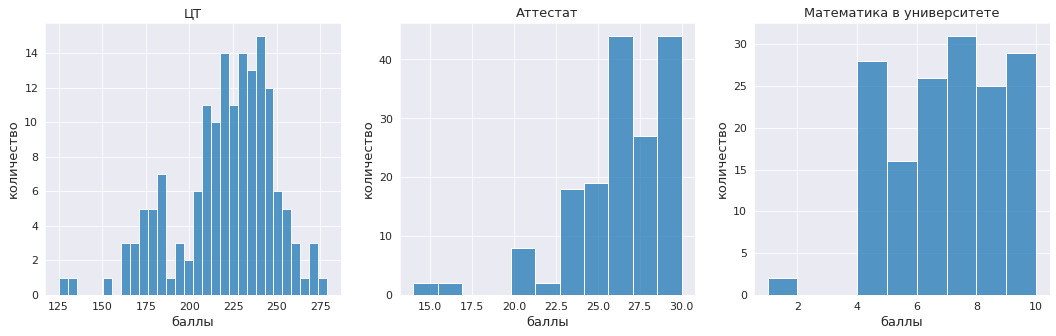

In [ ]:
plt.figure(figsize=(18,5))

plt.subplot(1, 3, 1, xlabel='баллы', ylabel='количество').set_title("ЦТ")
sns.histplot(data=df['CT_total'].dropna().values, bins=30)

plt.subplot(1, 3, 2, xlabel='баллы', ylabel='количество').set_title("Аттестат")
sns.histplot(data=df['school_total'].dropna().values)

plt.subplot(1, 3, 3, xlabel='баллы', ylabel='количество').set_title("Математика в университете")
sns.histplot(data=df['university_math'].dropna().values)
None


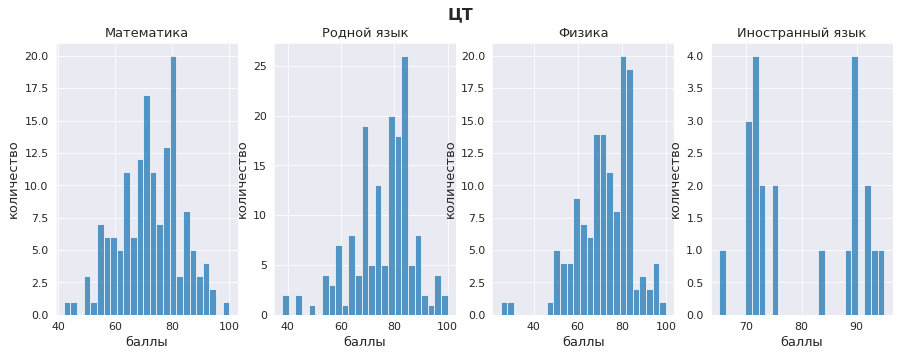

In [ ]:
plt.figure(figsize=(15,5)).suptitle("ЦТ", size='x-large', fontweight="bold")
for ind, col_name, title in zip([1, 2, 3, 4], CT_cols, subj_titles):
  plt.subplot(1, 4, ind, xlabel='баллы', ylabel='количество').set_title(title)
  sns.histplot(data=df[col_name].dropna().values, bins=25)

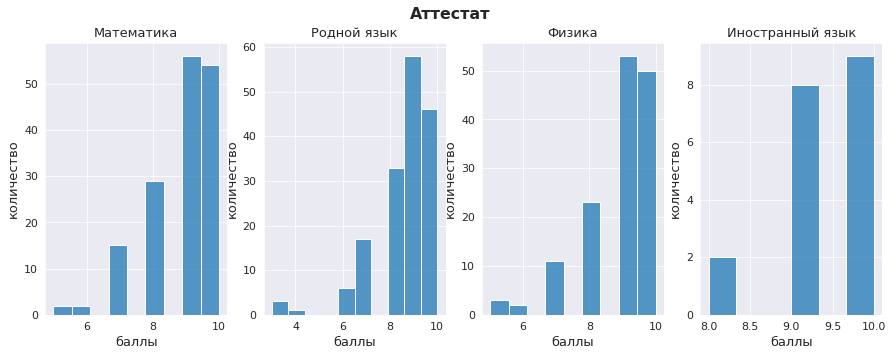

In [ ]:
plt.figure(figsize=(15,5)).suptitle("Аттестат", size='x-large', fontweight="bold")
for ind, col_name, title in zip([1, 2, 3, 4], school_cols, subj_titles):
  plt.subplot(1, 4, ind, xlabel='баллы', ylabel='количество').set_title(title)
  sns.histplot(data=df[col_name].dropna().values)

## Коэффицент Пирсона между баллами ЦТ, аттестата и математики в университете для студентов с одного потока (поит исит 2 курс)

In [ ]:
df_my_stream = df.loc[df.stream.notna()]

In [ ]:
CT_cols = ['CT_math', 'CT_native_language', 'CT_physics']
school_cols = ['school_math', 'school_native_language', 'school_physics']
subj_titles = ['Математика', 'Родной язык', 'Физика']

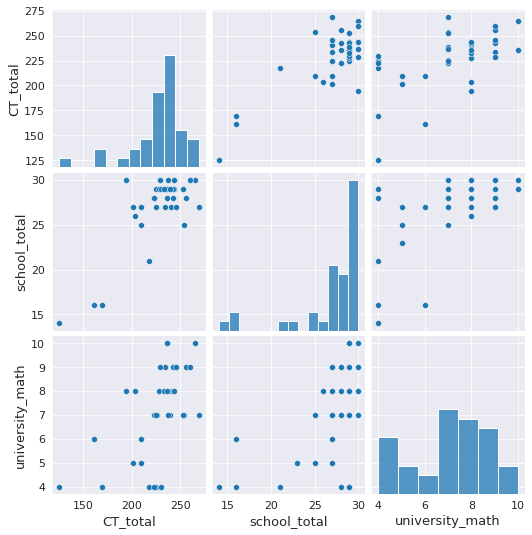

In [ ]:
sns.pairplot(df_my_stream[total_math + ['university_math']])
plt.show()

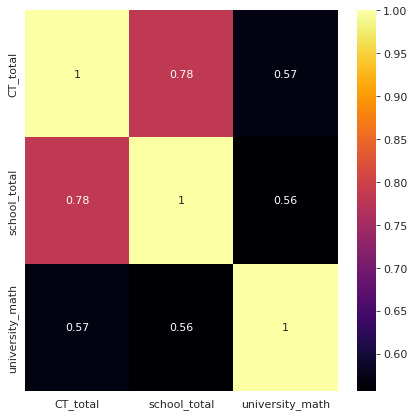

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(df_my_stream[total_math + ['university_math']].corr(), annot = True, cmap='inferno')
plt.show()

## Корреляция между баллами по различным предметам и баллом по математике в университете для студентов с одного потока (поит исит 2)

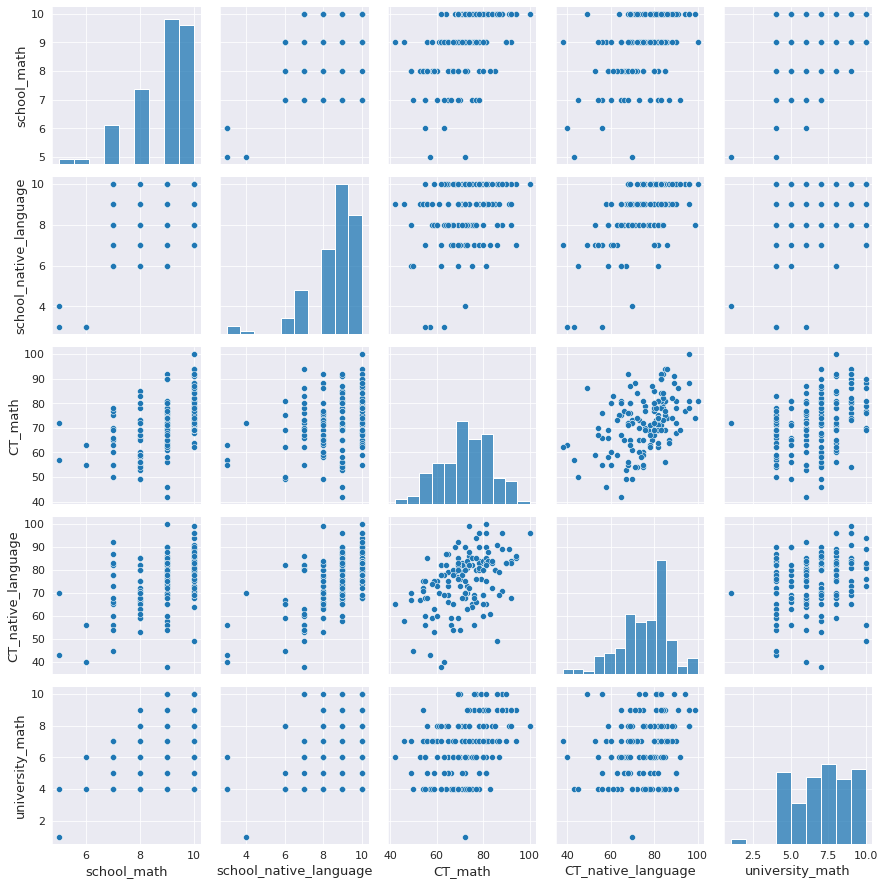

In [ ]:
cols_for_corr = school_cols[:-1] + CT_cols[:-1] + ["university_math"]

sns.pairplot(df_my_stream[cols_for_corr])
plt.show()

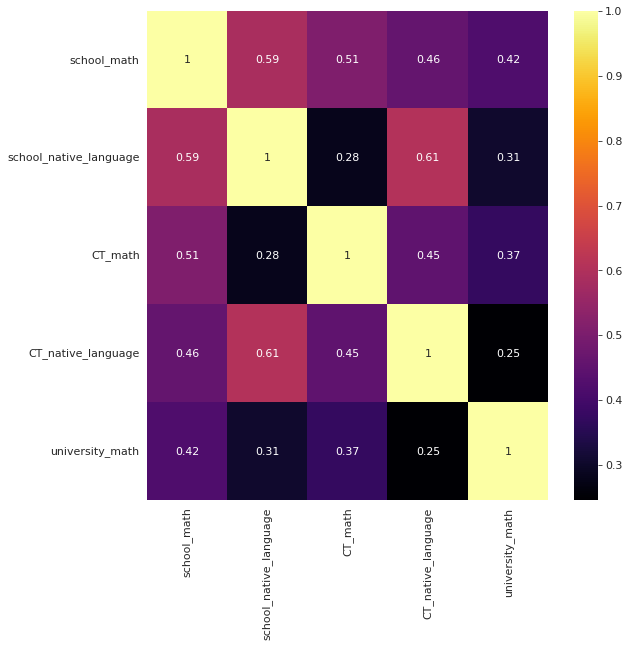

In [ ]:
plt.figure(figsize=(9,9))

sns.heatmap(df_my_stream[cols_for_corr].corr(), annot = True, cmap='inferno')
plt.show()

## Графики баллов в зависимости от *пола*

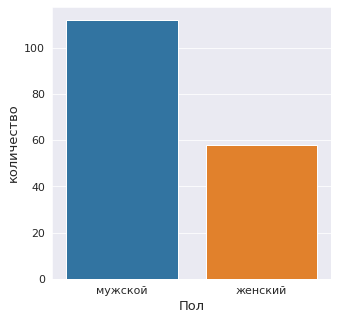

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='gender', data=df)
plt.xlabel('Пол')
plt.ylabel('количество')
None

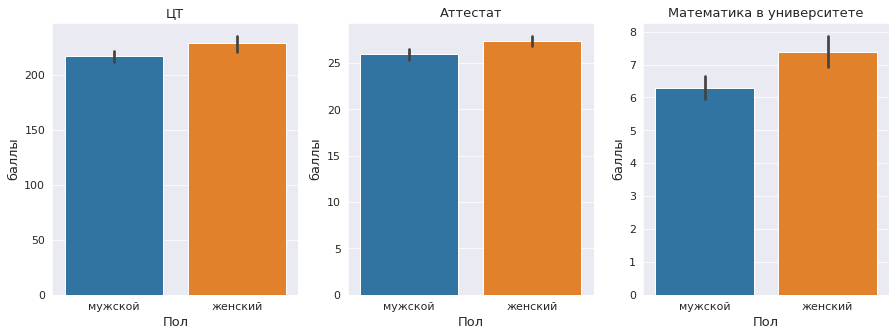

In [ ]:
plt.figure(figsize=(15,5))

for ind, col_name, title in zip([1, 2, 3], ['CT_total', 'school_total', 'university_math'], 
                                ['ЦТ', 'Аттестат', 'Математика в университете']):
  plt.subplot(1,3,ind).set_title(title)
  sns.barplot(x = 'gender', y = col_name, data = df)
  plt.xlabel('Пол')
  plt.ylabel('баллы')

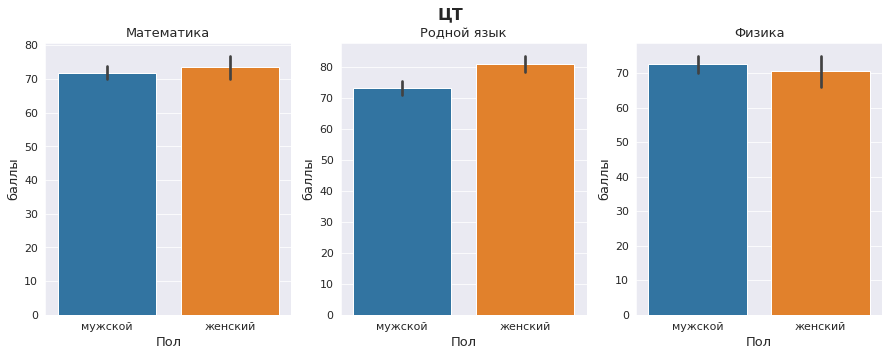

In [ ]:
plt.figure(figsize=(15,5)).suptitle("ЦТ", size='x-large', fontweight="bold")
for ind, col_name, title in zip([1, 2, 3], CT_cols, subj_titles):
  plt.subplot(1, 3, ind).set_title(title)
  sns.barplot(x = 'gender', y = col_name, data = df)
  plt.xlabel('Пол')
  plt.ylabel('баллы')

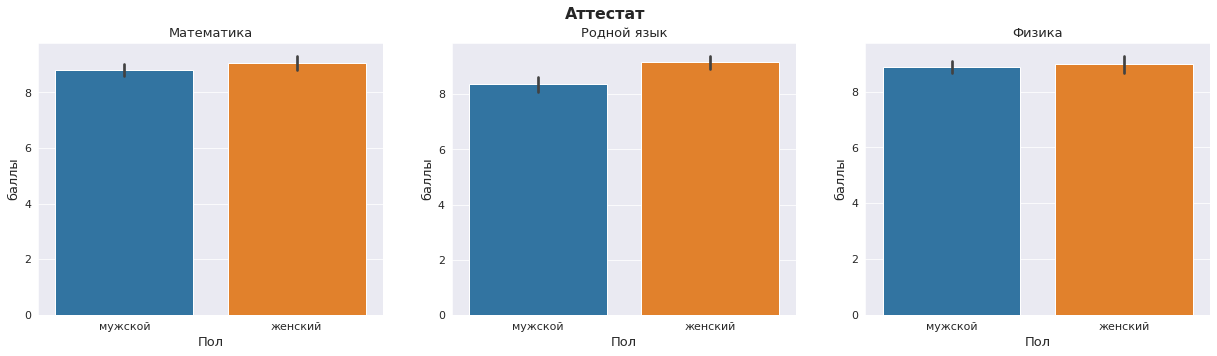

In [ ]:
plt.figure(figsize=(21,5)).suptitle("Аттестат", size='x-large', fontweight="bold")
for ind, col_name, title in zip([1, 2, 3], school_cols, subj_titles):
  plt.subplot(1, 3, ind).set_title(title)
  sns.barplot(x = 'gender', y = col_name, data = df)
  plt.xlabel('Пол')
  plt.ylabel('баллы')

## Распределение значений категориальных признаков

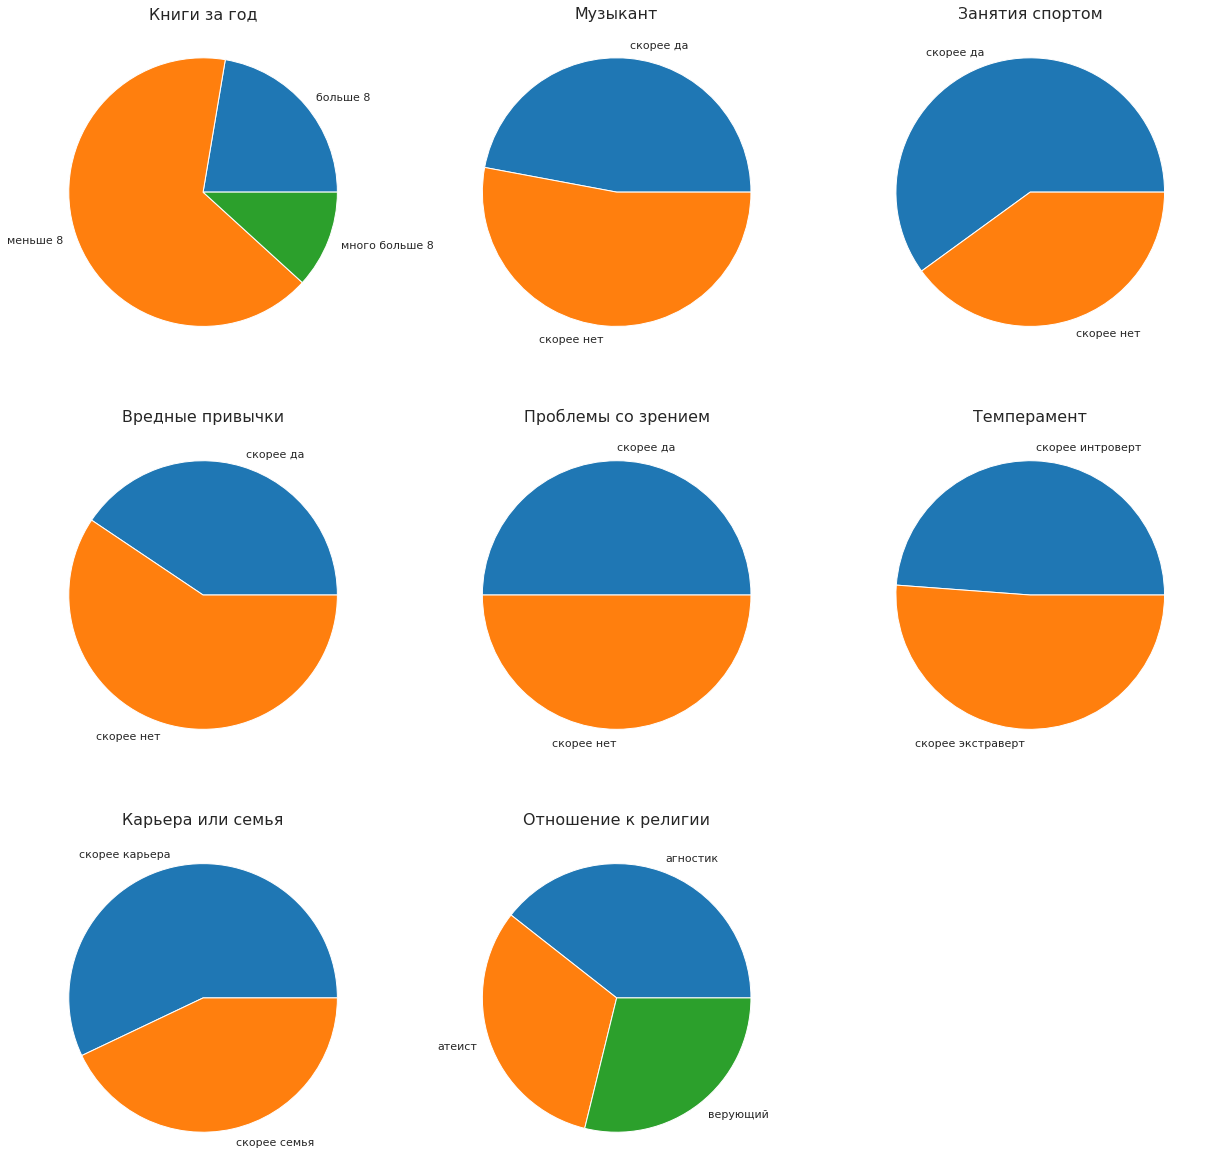

In [ ]:
cat_cols = ['math_olympiad', 'chess', 'rubiks_cube', 'books',
            'musician', 'sport', 'bad_habit', 'vision_problem',
            'temperament', 'career_family', 'belief']
labels = ['Олимпиада по математике', 'Шахматы', "Кубик рубика", "Книги за год",
          "Музыкант", "Занятия спортом", "Вредные привычки", "Проблемы со зрением",
          "Темперамент", "Карьера или семья", "Отношение к религии"]

plt.figure(figsize=(21,21))
ind = 1
for label, col in zip(labels[3:], cat_cols[3:]):
  plt.subplot(3,3,ind)
  ind += 1
  df.groupby(col).size().plot(kind='pie')
  plt.ylabel('')
  plt.title(label,size='x-large')


## Связь между отметками по математике и участием в олимпиаде, собиранием кубика Рубика и игрой в шахматы для студентов с одного потока (поит исит 2)

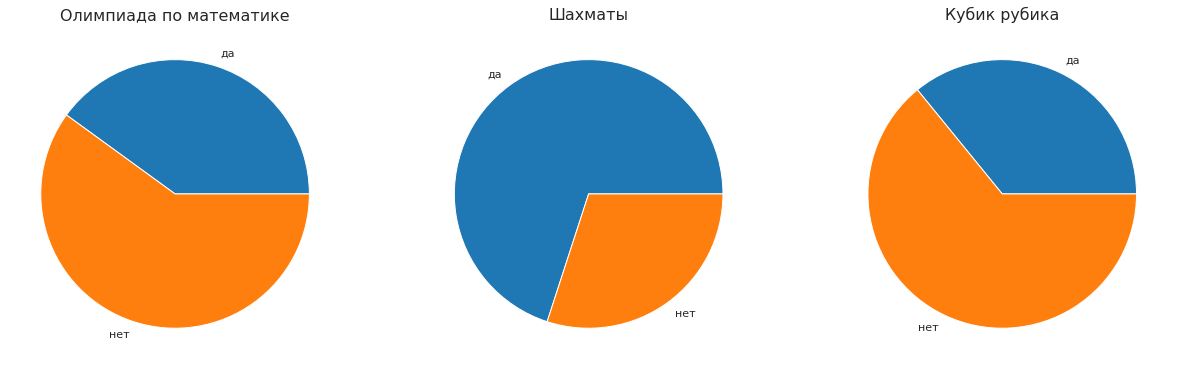

In [ ]:
plt.figure(figsize=(21,21))
ind = 1
for label, col in zip(labels[:3], cat_cols[:3]):
  plt.subplot(3,3,ind)
  ind += 1
  df.groupby(col).size().plot(kind='pie')
  plt.ylabel('')
  plt.title(label,size='x-large')

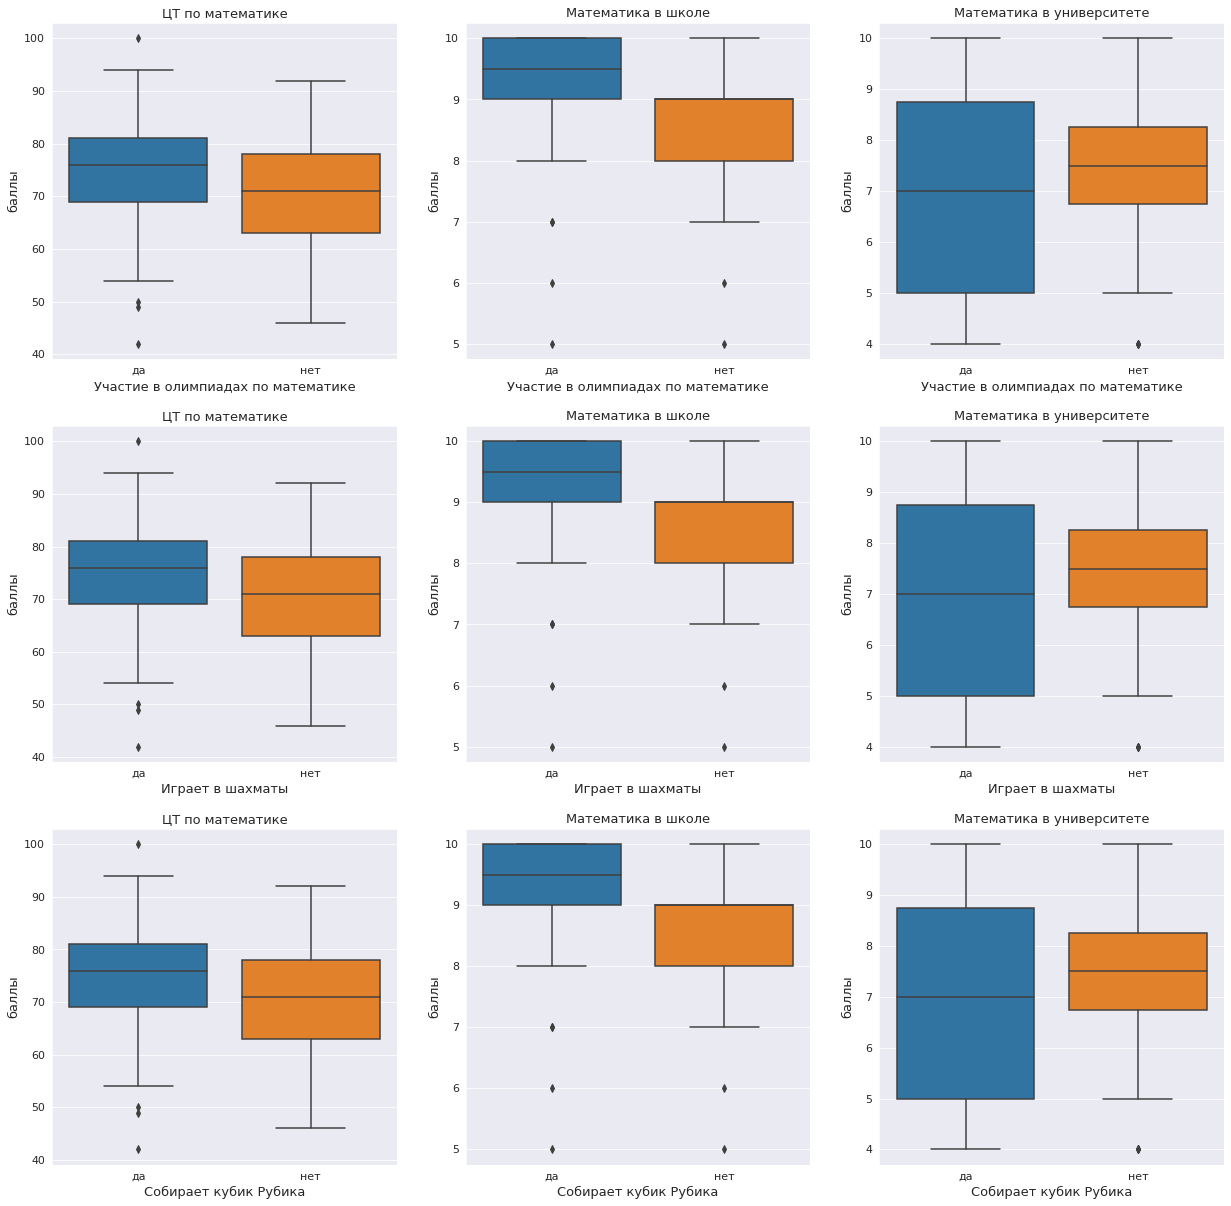

In [ ]:
plt.figure(figsize=(21,21))
ind = 1
for col_name, title in zip(['CT_math', 'school_math', 'university_math'], 
                           ['ЦТ по математике', 'Математика в школе', 'Математика в университете']):
  plt.subplot(3,3,ind).set_title(title)
  ind += 1
  if col_name != "university_math":
    sns.boxplot(x = 'math_olympiad', y = col_name, data = df)
  else:
    sns.boxplot(x = 'math_olympiad', y = col_name, data = df_my_stream)
  plt.xlabel('Участие в олимпиадах по математике')
  plt.ylabel('баллы')

for col_name, title in zip(['CT_math', 'school_math', 'university_math'],
                           ['ЦТ по математике', 'Математика в школе', 'Математика в университете']):
  plt.subplot(3,3,ind).set_title(title)
  ind += 1
  if col_name != "university_math":
    sns.boxplot(x = 'math_olympiad', y = col_name, data = df)
  else:
    sns.boxplot(x = 'math_olympiad', y = col_name, data = df_my_stream)
  plt.xlabel('Играет в шахматы')
  plt.ylabel('баллы')

for col_name, title in zip(['CT_math', 'school_math', 'university_math'],
                           ['ЦТ по математике', 'Математика в школе', 'Математика в университете']):
  plt.subplot(3,3,ind).set_title(title)
  ind += 1
  if col_name != "university_math":
    sns.boxplot(x = 'math_olympiad', y = col_name, data = df)
  else:
    sns.boxplot(x = 'math_olympiad', y = col_name, data = df_my_stream)
  plt.xlabel('Собирает кубик Рубика')
  plt.ylabel('баллы')